El notebook tiene como objetivo el presentar ejemplos de aplicacion de tecnicas de transformacion para pre-procesamiento de los datos previos a su uso en los modelos de ML

## Librerias

In [38]:
## Conjunto de librerias a usar

# Generales
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import seaborn as sns
import dill
from IPython.display import Image  
import pydotplus

# Clonar modelos creados
from sklearn.base import clone 


## Funciones/Classes para Modelos
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn import tree


## Preprocesamiento
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler


# Conjunto de Datos a cargar
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons
from sklearn.datasets import load_iris


## Clasificadores 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


## librerias Regresion Lineal
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor ## Stochastic gradient descent (alternativa Mini-Batch)
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression


## IMPORTANTE: Libreria sklearn
import sklearn as skl ## importar la libreria de sklearn como skl


## SVM 
from sklearn.svm import LinearSVC # clasificacion
from sklearn.svm import LinearSVR # regresion
from sklearn.svm import SVC
from sklearn.svm import SVR

## Trees - Arboles de decisiones
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz


## advertencias
import warnings
## Ignorar las advertencias
warnings.filterwarnings('ignore')
## warnings.filterwarnings('always') ## mostrar advertencias


## fin

## Cargar datos

In [2]:
# cargar datos

# leer datos
iris = datasets.load_iris()
X = iris['data']
y = iris['target']

# fin

In [3]:
# imprimir los nombres de las variables que se dispone en la data

print(iris['feature_names'])
print('\n')
print(iris['target_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


['setosa' 'versicolor' 'virginica']


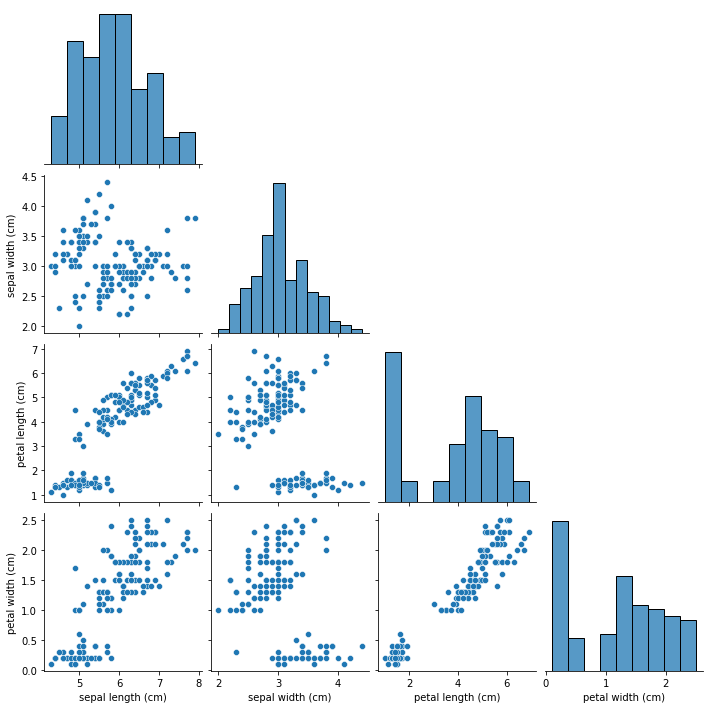

In [4]:
# Ver las relaciones entre variables - exploracion conjunta

sns.pairplot(pd.DataFrame(X,columns=iris['feature_names']),corner=True)

## Escaladores y Transformados comunes

In [7]:
# Ejemplo de prueba de como se aplica el escalamiento

scaler = StandardScaler()
scaler.fit(X)  ## ajustar modelo
Xt = scaler.transform(X) # transformar datos
Xa= scaler.inverse_transform(Xt) ## proceso inverso

# fin

In [8]:
# Imprimir parametros generados al ajustar el escalador

# medias (mu)
print(scaler.mean_)

# desviaciones estadar (std)
print(scaler.scale_)

[5.84333333 3.05733333 3.758      1.19933333]
[0.82530129 0.43441097 1.75940407 0.75969263]


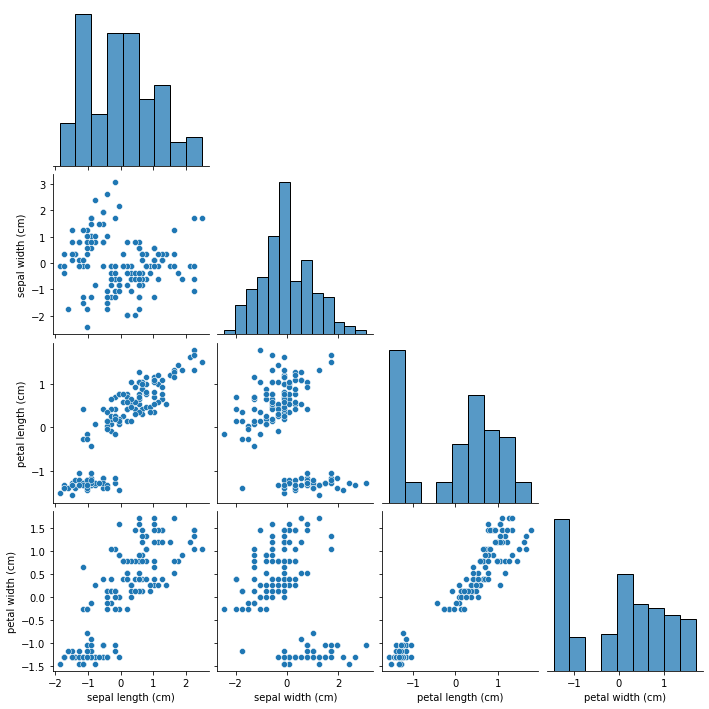

In [9]:
# Ver distribuciones conjuntas post-escalamiento

sns.pairplot(pd.DataFrame(Xt,columns=iris['feature_names']),corner=True)

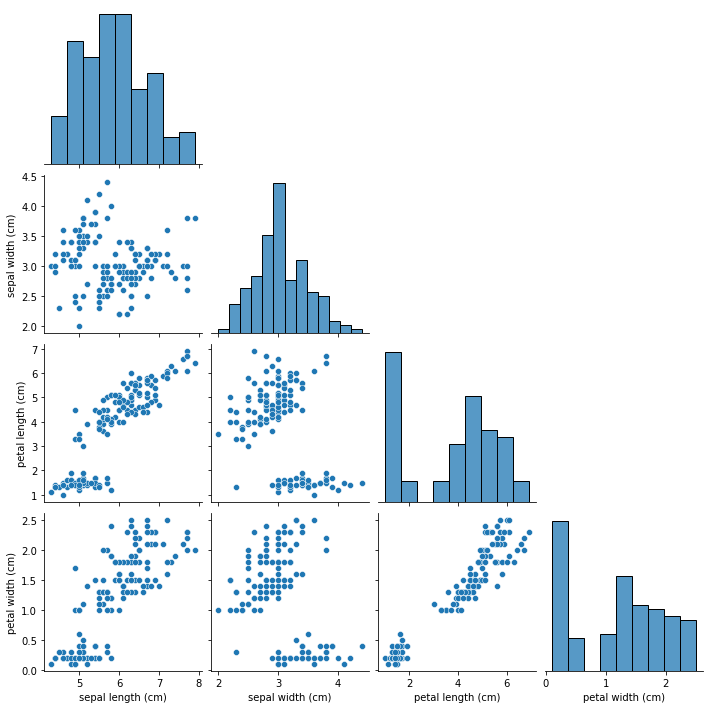

In [16]:
# cambiar orden
sns.pairplot(pd.DataFrame(Xa,columns=iris['feature_names']),corner=True)

### MinMaxScaler

In [10]:
## Ajustar escalador segun MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)  ## ajustar modelo
Xt = scaler.transform(X) # transformar datos
Xa= scaler.inverse_transform(Xt) ## proceso inverso

print('Original:')
print(X[:5])
print('\nTransformado:')
print(Xt[:5])
print('Inverso:')
print(Xa[:5])

# fin

Original:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Transformado:
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]
Inverso:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


### StandardScaler

In [8]:
## Ajustar escalador segun StandardScaler

scaler = StandardScaler()
scaler.fit(X)  ## ajustar modelo
Xt = scaler.transform(X) # transformar datos
Xa= scaler.inverse_transform(Xt) ## proceso inverso

print('Original:')
print(X[:5])
print('\nTransformado:')
print(Xt[:5])
print('Inverso:')
print(Xa[:5])

# fin

Original:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Transformado:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
Inverso:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


### MaxAbsScaler

In [9]:
## Ajustar escalador segun MaxAbsScaler

scaler = MaxAbsScaler()
scaler.fit(X)  ## ajustar modelo
Xt = scaler.transform(X) # transformar datos
Xa= scaler.inverse_transform(Xt) ## proceso inverso

print('Original:')
print(X[:5])
print('\nTransformado:')
print(Xt[:5])
print('Inverso:')
print(Xa[:5])

# fin

Original:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Transformado:
[[0.64556962 0.79545455 0.20289855 0.08      ]
 [0.62025316 0.68181818 0.20289855 0.08      ]
 [0.59493671 0.72727273 0.1884058  0.08      ]
 [0.58227848 0.70454545 0.2173913  0.08      ]
 [0.63291139 0.81818182 0.20289855 0.08      ]]
Inverso:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


### RobustScaler

In [10]:
## Ajustar escalador segun RobustScaler

scaler = RobustScaler()
scaler.fit(X)  ## ajustar modelo
Xt = scaler.transform(X) # transformar datos
Xa= scaler.inverse_transform(Xt) ## proceso inverso

print('Original:')
print(X[:5])
print('\nTransformado:')
print(Xt[:5])
print('Inverso:')
print(Xa[:5])

# fin

Original:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Transformado:
[[-0.53846154  1.         -0.84285714 -0.73333333]
 [-0.69230769  0.         -0.84285714 -0.73333333]
 [-0.84615385  0.4        -0.87142857 -0.73333333]
 [-0.92307692  0.2        -0.81428571 -0.73333333]
 [-0.61538462  1.2        -0.84285714 -0.73333333]]
Inverso:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


### Transformacion a Gaussianas

In [13]:
## Ajustar transformador segun PowerTransformer 

# Metodo de Yeo-Johnson
scaler = PowerTransformer(method='yeo-johnson')
scaler.fit(X)  ## ajustar modelo
Xt = scaler.transform(X) # transformar datos
Xa= scaler.inverse_transform(Xt) ## proceso inverso

# Metodo Box-Cox
scaler2 = PowerTransformer(method='box-cox')
scaler2.fit(X)  ## ajustar modelo
Xt2 = scaler.transform(X) # transformar datos
Xa2= scaler.inverse_transform(Xt2) ## proceso inverso

# fin

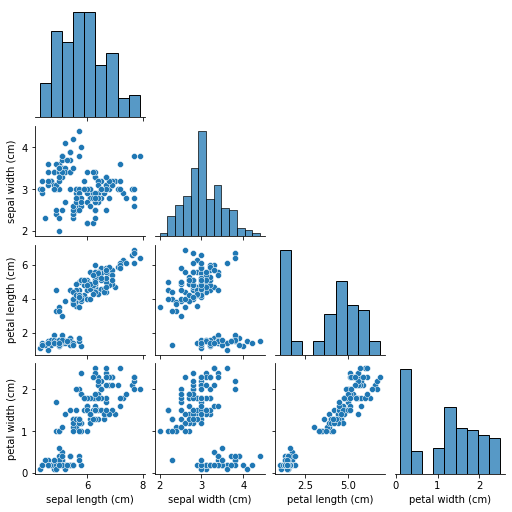

In [21]:
# Visualizar distribuciones conjuntas

sns.pairplot(pd.DataFrame(X,columns=iris['feature_names']),corner=True,height=1.8, aspect=1)

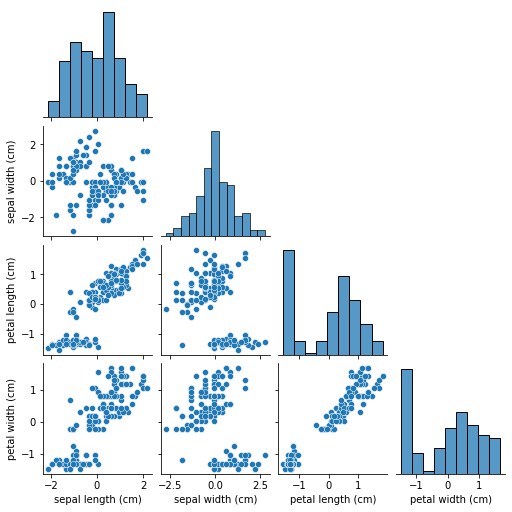

In [22]:
# Visualizar distribuciones conjuntas

sns.pairplot(pd.DataFrame(Xt,columns=iris['feature_names']),corner=True,height=1.8, aspect=1)

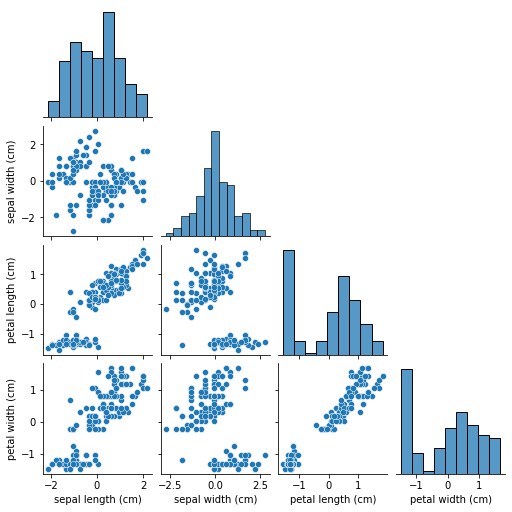

In [23]:
# Visualizar distribuciones conjuntas

sns.pairplot(pd.DataFrame(Xt2,columns=iris['feature_names']),corner=True,height=1.8, aspect=1)

### Quantile Transformer - Gaussian

In [29]:
## Ajustar transformador segun QuantileTransformer

scaler = QuantileTransformer(output_distribution='normal',random_state=0)
scaler.fit(X)  ## ajustar modelo
Xt = scaler.transform(X) # transformar datos
Xa= scaler.inverse_transform(Xt) ## proceso inverso

print('Original:')
print(X[:8])
print('\nTransformado:')
print(Xt[:8])
print('Inverso:')
print(Xa[:8])

# fin

Original:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]]

Transformado:
[[-0.70113066  1.06121852 -1.20503985 -1.1382082 ]
 [-1.15443433 -0.08421448 -1.20503985 -1.1382082 ]
 [-1.52396771  0.44306583 -1.67487005 -1.1382082 ]
 [-1.71009492  0.22909903 -0.83683635 -1.1382082 ]
 [-0.92358064  1.22261139 -1.20503985 -1.1382082 ]
 [-0.45236409  1.87784272 -0.50901993 -0.53796092]
 [-1.71009492  0.82495705 -1.20503985 -0.67977917]
 [-0.92358064  0.82495705 -0.83683635 -1.1382082 ]]
Inverso:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]]


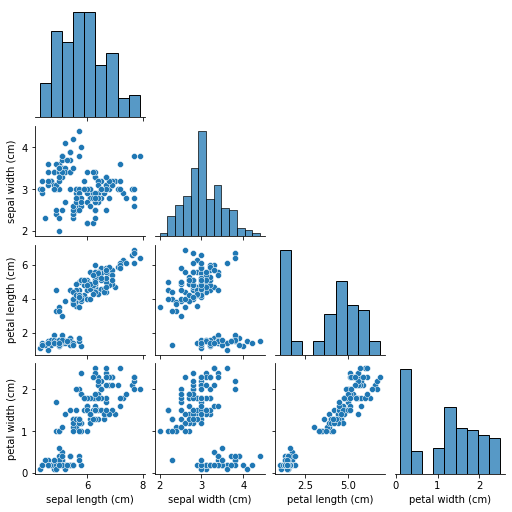

In [27]:
# Visualizar distribuciones conjuntas
sns.pairplot(pd.DataFrame(X,columns=iris['feature_names']),corner=True,height=1.8, aspect=1)

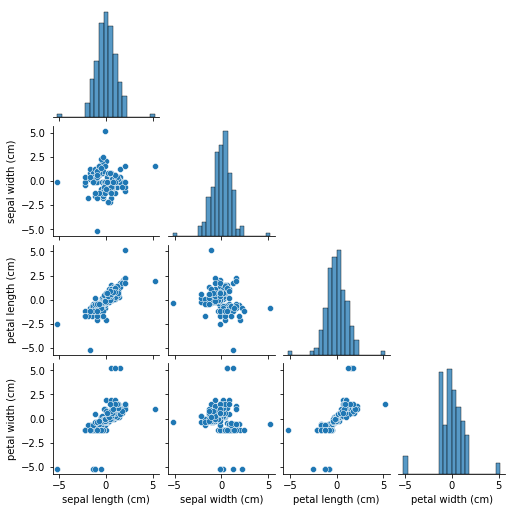

In [28]:
# Visualizar distribuciones conjuntas
sns.pairplot(pd.DataFrame(Xt,columns=iris['feature_names']),corner=True,height=1.8, aspect=1)

### KBinsDiscretizer

In [32]:
## Ajustar transformador segun KBinsDiscretizer

## encode: onehot, onehot-dense, ordinal
## strategy: uniform, quantile, kmeans

scaler = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
scaler.fit(X)  ## ajustar modelo
Xt = scaler.transform(X) # transformar datos
Xa= scaler.inverse_transform(Xt) ## proceso inverso

print('Original:')
print(X[:12])
print('\nTransformado:')
print(Xt[:12])
print('Inverso:')
print(Xa[:12])

# fin

Original:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]]

Transformado:
[[0. 3. 0. 0.]
 [0. 2. 0. 0.]
 [0. 2. 0. 0.]
 [0. 2. 0. 0.]
 [0. 3. 0. 0.]
 [1. 3. 0. 0.]
 [0. 2. 0. 0.]
 [0. 2. 0. 0.]
 [0. 1. 0. 0.]
 [0. 2. 0. 0.]
 [1. 3. 0. 0.]
 [0. 2. 0. 0.]]
Inverso:
[[4.77166667 3.66733193 1.731125   0.38316667]
 [4.77166667 3.18767138 1.731125   0.38316667]
 [4.77166667 3.18767138 1.731125   0.38316667]
 [4.77166667 3.18767138 1.731125   0.38316667]
 [4.77166667 3.66733193 1.731125   0.38316667]
 [5.56880952 3.66733193 1.731125   0.38316667]
 [4.77166667 3.18767138 1.731125   0.38316667]
 [4.77166667 3.18767138 1.731125   0.38316667]
 [4.77166667 2.7681308  1.731125   0.38316667]
 [4.77166667 3.18767138 1.731125   0.38316667]
 [5.56880952 3.66733193 1.731125   0.38316667]
 [4.77166667 3.18767138 1.731125   0.38

### Polynomial

In [37]:
# Ajsutar transformador segun PolynomialFeatures

scaler = PolynomialFeatures(degree=2,include_bias=True,interaction_only=False)
scaler.fit(X)  ## ajustar modelo
Xt = scaler.transform(X) # transformar datos

print('Original:')
print(X[:12])
print('\nTransformado:')
print(Xt[:12])



Original:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]]

Transformado:
[[1.000e+00 5.100e+00 3.500e+00 1.400e+00 2.000e-01 2.601e+01 1.785e+01
  7.140e+00 1.020e+00 1.225e+01 4.900e+00 7.000e-01 1.960e+00 2.800e-01
  4.000e-02]
 [1.000e+00 4.900e+00 3.000e+00 1.400e+00 2.000e-01 2.401e+01 1.470e+01
  6.860e+00 9.800e-01 9.000e+00 4.200e+00 6.000e-01 1.960e+00 2.800e-01
  4.000e-02]
 [1.000e+00 4.700e+00 3.200e+00 1.300e+00 2.000e-01 2.209e+01 1.504e+01
  6.110e+00 9.400e-01 1.024e+01 4.160e+00 6.400e-01 1.690e+00 2.600e-01
  4.000e-02]
 [1.000e+00 4.600e+00 3.100e+00 1.500e+00 2.000e-01 2.116e+01 1.426e+01
  6.900e+00 9.200e-01 9.610e+00 4.650e+00 6.200e-01 2.250e+00 3.000e-01
  4.000e-02]
 [1.000e+00 5.000e+00 3.600e+00 1.400e+00 2.000e-01 2.500e+01 1.800e+01
  7.000e+00 1.000e+00 1.296e+01 5.040e+00 7.20

## Transformacion personalizada

In [43]:
# Realizar una transformacion personalizada segun se funcion a indicar

# se le indica que la funcion a transformar es "log", y su funcion inversa es "exp"
scaler = FunctionTransformer(np.log,validate=True,inverse_func=np.exp)
scaler.fit(X)  ## ajustar modelo
Xt = scaler.transform(X) # transformar datos
Xa= scaler.inverse_transform(Xt) ## proceso inverso

print('Original:')
print(X[:12])
print('\nTransformado:')
print(Xt[:12])
print('\nInverso:')
print(Xa[:12])


Original:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]]

Transformado:
[[ 1.62924054  1.25276297  0.33647224 -1.60943791]
 [ 1.58923521  1.09861229  0.33647224 -1.60943791]
 [ 1.54756251  1.16315081  0.26236426 -1.60943791]
 [ 1.5260563   1.13140211  0.40546511 -1.60943791]
 [ 1.60943791  1.28093385  0.33647224 -1.60943791]
 [ 1.68639895  1.36097655  0.53062825 -0.91629073]
 [ 1.5260563   1.22377543  0.33647224 -1.2039728 ]
 [ 1.60943791  1.22377543  0.40546511 -1.60943791]
 [ 1.48160454  1.06471074  0.33647224 -1.60943791]
 [ 1.58923521  1.13140211  0.40546511 -2.30258509]
 [ 1.68639895  1.30833282  0.40546511 -1.60943791]
 [ 1.56861592  1.22377543  0.47000363 -1.60943791]]

Inverso:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4